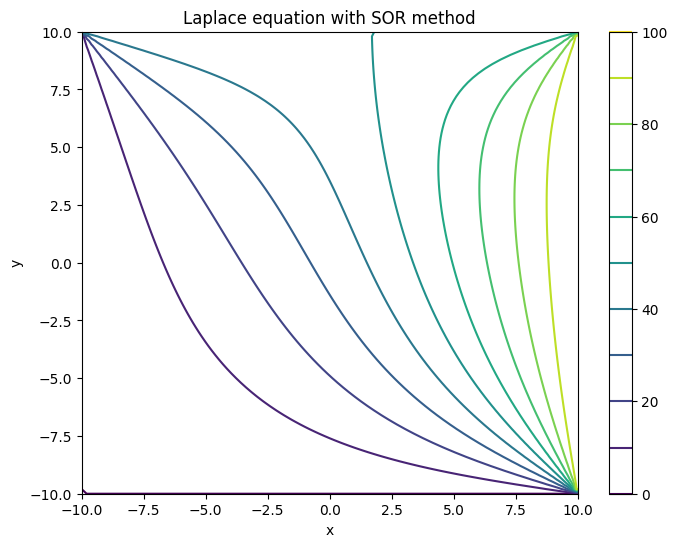

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid
xmin, xmax, ymin, ymax = -10, 10, -10, 10
N = 101 # number of grid points in each direction
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
dx = x[1]-x[0]
dy = y[1]-y[0]
X, Y = np.meshgrid(x, y)

# Set the boundary conditions
u = np.zeros((N,N))
u[:,0] = 0 # u(-10,y) = 0
u[:,-1] = 100 # u(10,y) = 100
u[0,:] = 0 # u(x,-10) = 0
u[-1,:] = 50 # u(x,10) = 50

# Set the SOR parameters
omega_vals = np.linspace(1.2, 1.8, 7)
tol = 1e-2 # tolerance for convergence
max_iter = 100 # maximum number of iterations

# Solve the Laplace equation using the SOR method for different omega values
for omega in omega_vals:
    u_prev = u.copy() # previous iteration solution
    for k in range(max_iter):
        # Iterate over all interior points
        for i in range(1,N-1):
            for j in range(1,N-1):
                u[i,j] = (1-omega)*u_prev[i,j] + (omega/4)*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1])
        # Check for convergence
        if np.max(np.abs(u-u_prev)) < tol:
            print("Converged for omega = ", omega, " after ", k+1, " iterations")
            break
        u_prev = u.copy()

# Plot the potential
fig, ax = plt.subplots(figsize=(8,6))
levels = np.linspace(0,100,11)
cont = ax.contour(X, Y, u, levels=levels)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Laplace equation with SOR method')
plt.colorbar(cont)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define parameters
N = 101         # number of grid points in each direction
L = 20          # length of box in each direction
dx = L/(N-1)    # grid spacing in x direction
dy = L/(N-1)    # grid spacing in y direction
x = np.linspace(-L/2, L/2, N)   # x coordinates
y = np.linspace(-L/2, L/2, N)   # y coordinates
X, Y = np.meshgrid(x, y)

# define charge density function
sigma = 0.5
d = 5
rho = (1/np.sqrt(2*np.pi*sigma**2))*(
    np.exp((-X*2 + (Y-0.5*d)**2)/(2*sigma*2)) -
    np.exp((-X*2 + (Y+0.5*d)**2)/(2*sigma*2))
)

# set boundary conditions
u = np.zeros((N,N))
u[0,:] = 0      # u(x=-10,y) = 0
u[-1,:] = 100   # u(x=10,y) = 100
u[:,0] = 0      # u(x,y=-10) = 0
u[:,-1] = 50    # u(x,y=10) = 50

# implement SOR method
omega = 1.9      # relaxation parameter
error = 1e-4     # error tolerance
max_iter = 10000 # maximum number of iterations
for n in range(max_iter):
    u_old = u.copy()
    for i in range(1,N-1):
        for j in range(1,N-1):
            u[i,j] = (1-omega)*u[i,j] + (omega/4)*(
                u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] +
                (dx/epsilon_0)*rho[i,j]
            )
    if np.max(np.abs(u - u_old)) < error:
        break

# plot potential
plt.contourf(X, Y, u, cmap='viridis')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potential')
plt.show()

NameError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters and grid sizes
sigma = 0.5
d = 5
N_values = [9, 19, 29, 39, 49, 99, 199, 299, 399, 499]
u_values = []

# Iterate over different grid sizes
for N in N_values:
    # Define grid and spacing
    x = np.linspace(-10, 10, N)
    y = np.linspace(-10, 10, N)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    X, Y = np.meshgrid(x, y)

    # Define charge distribution
    rho = (1 / np.sqrt(2*np.pi*sigma*2)) * (np.exp(-(X2 + (Y-0.5*d)**2) / (2*sigma2)) - np.exp(-(X2 + (Y+0.5*d)**2) / (2*sigma*2)))

    # Set boundary conditions
    u = np.zeros((N, N))
    u[0, :] = 0
    u[-1, :] = 100
    u[:, 0] = 0
    u[:, -1] = 50

    # Solve using SOR method
    omega = 1.5
    max_iter = 5000
    tolerance = 1e-5
    for k in range(max_iter):
        u_old = u.copy()
        for i in range(1, N-1):
            for j in range(1, N-1):
                u[i, j] = (1 - omega) * u[i, j] + omega * 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - dx**2 * rho[i, j])
        if np.abs(u - u_old).max() < tolerance:
            break

    # Evaluate potential at point (2,0)
    x_index = np.argmin(np.abs(x - 2))
    y_index = np.argmin(np.abs(y - 0))
    u_values.append(u[x_index, y_index])

# Plot results
plt.plot(N_values, u_values, 'o-')
plt.xlabel('Number of grid points')
plt.ylabel('Potential at (2,0)')
plt.show()


NameError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
xmin, xmax, ymin, ymax = -10, 10, -10, 10
N = 50 # number of grid points in x and y directions
dx = (xmax - xmin)/(N - 1)
dy = (ymax - ymin)/(N - 1)
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)

# Define boundary conditions
u = np.zeros((N, N)) # initial guess for potential
u[0, :] = 0 # Dirichlet boundary condition at x = xmin
u[-1, :] = 100 # Dirichlet boundary condition at x = xmax
u[:, 0] = 0 # Dirichlet boundary condition at y = ymin
u[:, -1] = 50 # Dirichlet boundary condition at y = ymax

c = 0.5
d = 5
p = lambda x, y: (1/(np.sqrt(2*np.pi*c))) * (np.exp(-(x*2 + (y-0.5*d)**2)/(2*c2)) - np.exp(-(x2 + (y+0.5*d)**2)/(2*c*2)))

def sor(u, p, omega, maxiter):
    for k in range(maxiter):
        err = 0
        for i, j in itertools.product(range(1, N-1), range(1, N-1)):
            # Update potential using SOR formula
            u_old = u[i, j]
            u[i, j] = (1 - omega)*u[i, j] + omega*(u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - dx**2*p(x[i], y[j]))/4
            err = max(err, np.abs(u[i, j] - u_old))
        if err < 1e-5:
            print("Converged in", k, "iterations.")
            break
# Set charge density to zero
p = lambda x, y: 0

# Solve Laplace equation using SOR method
for omega in np.linspace(1.2, 1.8, 7):
    print("Omega =", omega)
    sor(u, p, omega, 10000)

# Plot potential
plt.imshow(u, origin="lower", extent=[xmin, xmax,ymin ,ymax] )

SyntaxError: ignored